In [18]:
"""
About the Dataset
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
"""

"\nAbout the Dataset\nSalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.\nMSSubClass: The building class\nMSZoning: The general zoning classification\nLotFrontage: Linear feet of street connected to property\nLotArea: Lot size in square feet\nStreet: Type of road access\nAlley: Type of alley access\nLotShape: General shape of property\nLandContour: Flatness of the property\nUtilities: Type of utilities available\nLotConfig: Lot configuration\nLandSlope: Slope of property\nNeighborhood: Physical locations within Ames city limits\nCondition1: Proximity to main road or railroad\nCondition2: Proximity to main road or railroad (if a second is present)\nBldgType: Type of dwelling\nHouseStyle: Style of dwelling\nOverallQual: Overall material and finish quality\nOverallCond: Overall condition rating\nYearBuilt: Original construction date\nYearRemodAdd: Remodel date\nRoofStyle: Type of roof\nRoofMatl: Roof material\nExterior1st: Exterior

In [19]:
#Importing the Essential Libraries, Metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [20]:
#Loading the Data
df = pd.read_csv("/content/train.csv")

In [21]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [22]:
"""
Exploratory Data Analysis
Taking a look at the first 5 rows of the dataset
"""
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
#Checking the shape—i.e. size—of the data
df.shape

(1460, 81)

In [24]:
#Learning the dtypes of columns' and how many non-null values are there in those columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
#Getting the statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


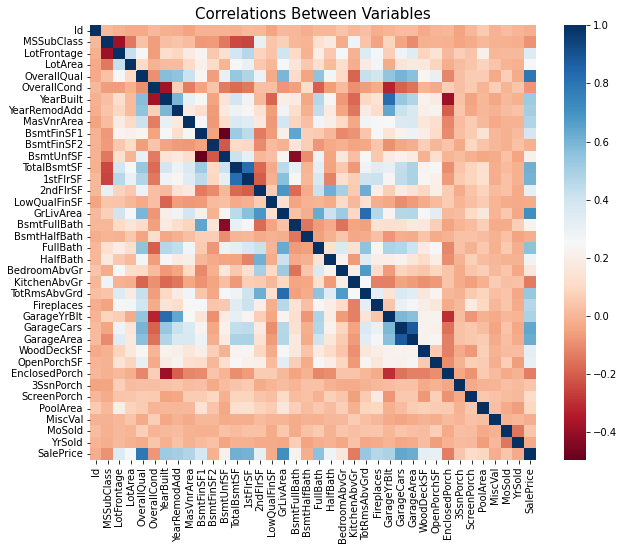

In [26]:
#Visualizing the correlations between numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [27]:
"""
Feature Selection
We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on 
Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for 
selecting categorical features, I selected the categorical values which 
I believe have significant effect on the target variable such as Heating and MSZoning.
"""

important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [28]:
df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920,1786,2,6,2,608,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961,1717,1,7,3,642,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [29]:
#Checking for the missing values
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


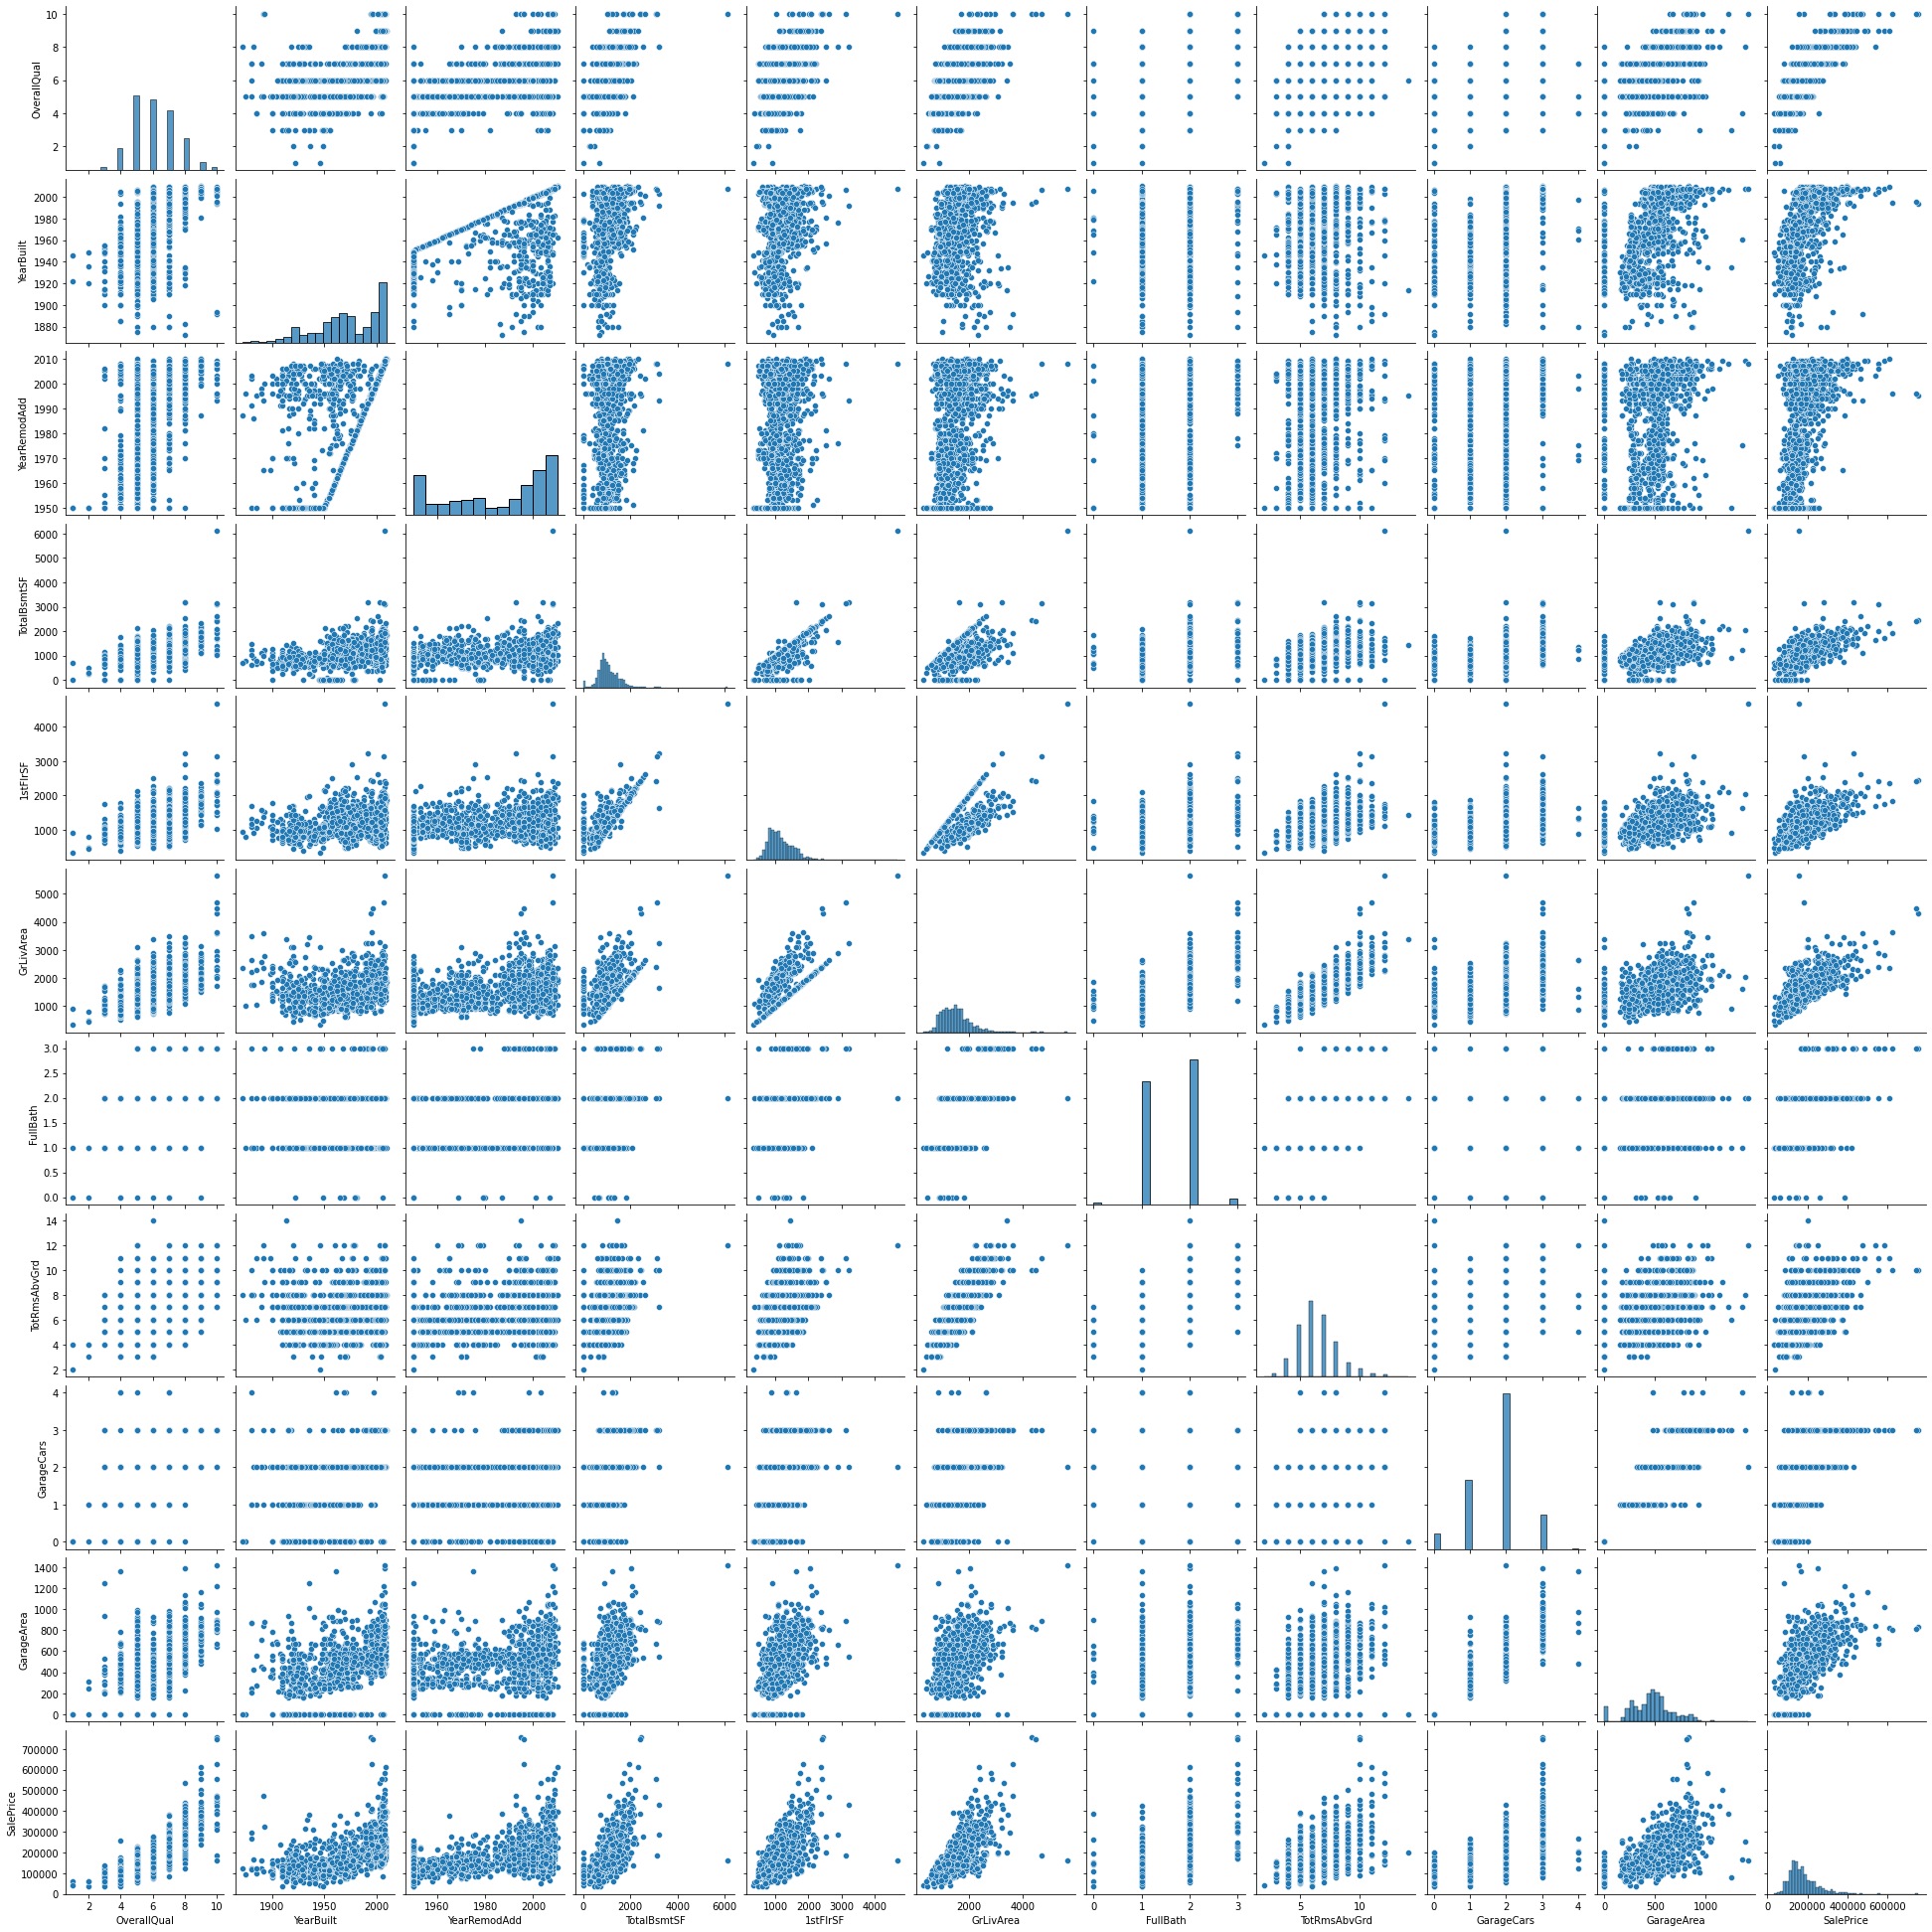

In [30]:
#Data Visualization
#Visualizing the Correlation between the numerical variables using pairplot visualization

sns.pairplot(df[important_num_cols])

<Figure size 720x576 with 0 Axes>

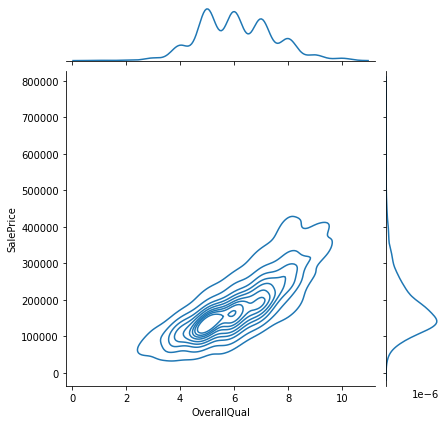

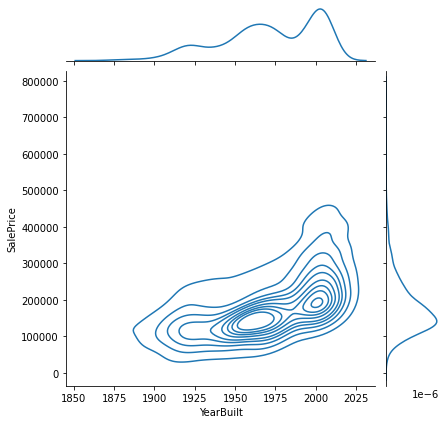

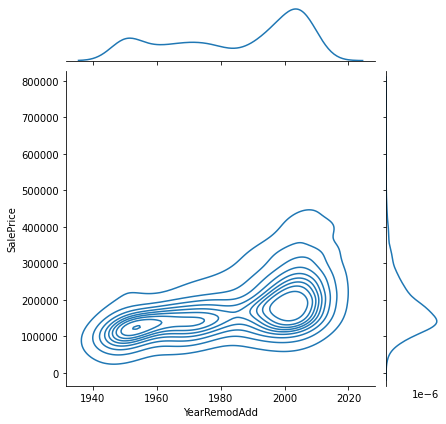

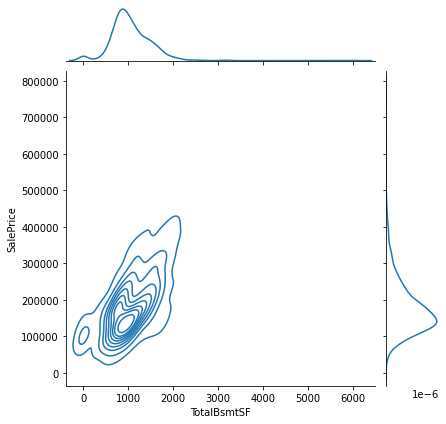

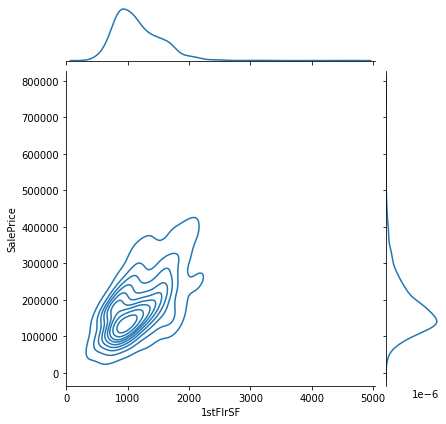

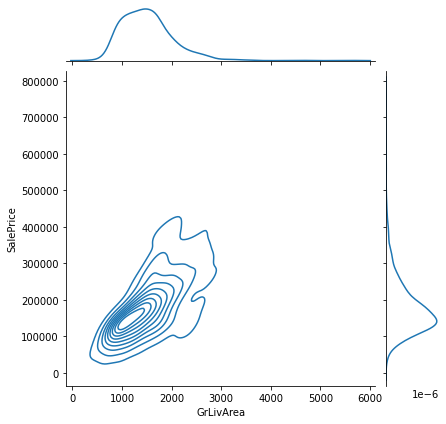

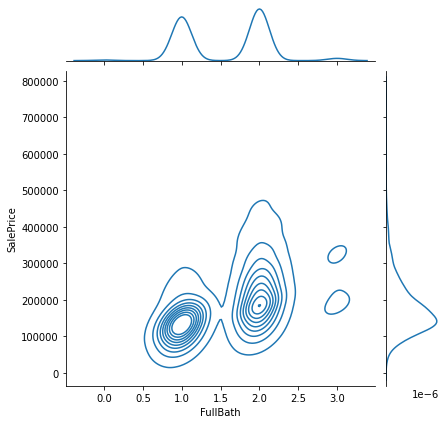

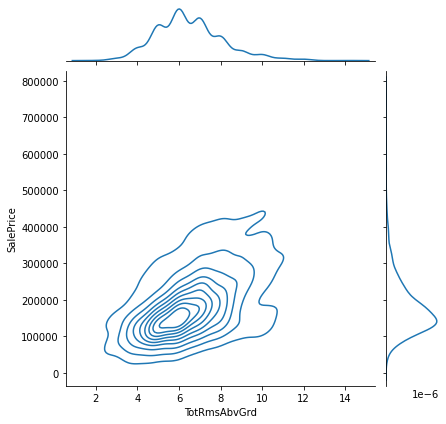

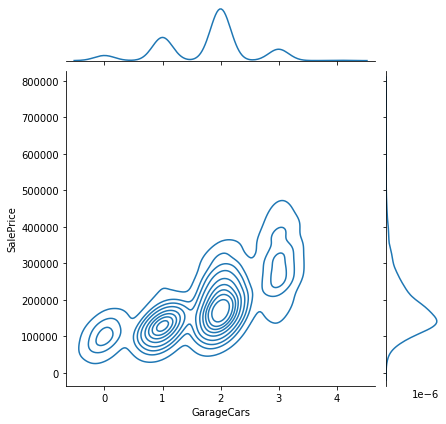

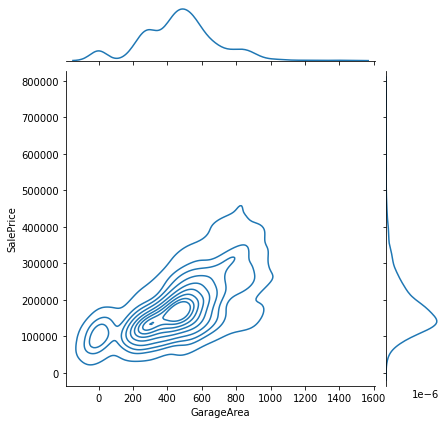

In [31]:
#Visualizing the Correlation between each column and the target variable using jointplot visualization
plt.figure(figsize=(10,8))
sns.jointplot(x=df["OverallQual"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearBuilt"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearRemodAdd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotalBsmtSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["1stFlrSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GrLivArea"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["FullBath"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotRmsAbvGrd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageCars"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageArea"], y=df["SalePrice"], kind="kde")
plt.show()

In [34]:
#X, y Split
#Splitting the data into X and y chunks
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [35]:
#One-Hot Encoding
#Encoding the categorical features in X dataset by using One-Hot Encoding method

X = pd.get_dummies(X, columns=cat_cols)

In [36]:
#Standardizing the Data
#Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows:
important_num_cols.remove("SalePrice")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [37]:
X[important_num_cols]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485
...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,0.733308,-0.238122,-0.542435,0.250402,0.789741,0.296763,0.311725,-0.060731
1456,-0.071836,0.222975,0.151865,1.104925,2.355701,1.061367,0.789741,0.296763,0.311725,0.126420
1457,0.651479,-1.002492,1.024029,0.215641,0.065656,1.569647,0.789741,1.527656,-1.026858,-1.033914
1458,-0.795151,-0.704406,0.539493,0.046905,-0.218982,-0.832788,-1.026041,-0.934130,-1.026858,-1.090059


In [38]:
#As you can see, standardization is done successfully
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0


In [39]:
#Train-Test Split
#Splitting the data into Train and Test chunks for better evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
254,-0.795151,-0.472560,-1.350194,0.585036,0.391697,-0.383521,-1.026041,-0.934130,-1.026858,-0.837406,...,1,0,0,0,0,1,0,1,0,0
1066,-0.071836,0.719786,0.442586,-0.589275,-0.940928,0.105723,0.789741,0.296763,0.311725,-0.435032,...,1,0,0,0,0,1,0,1,0,0
638,-0.795151,-2.029235,-1.689368,-0.596115,-0.948691,-1.369623,-1.026041,-1.549576,-2.365440,-2.212963,...,1,0,0,0,0,1,0,1,0,0
799,-0.795151,-1.134975,-1.689368,-0.744329,-0.469981,0.480746,-1.026041,0.296763,-1.026858,-1.090059,...,0,0,0,0,0,1,0,1,0,0
380,-0.795151,-1.565545,-1.689368,-0.071666,-0.353538,0.334164,0.789741,-0.318683,-1.026858,-0.771903,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.071836,1.150356,1.024029,0.585036,0.391697,-0.383521,0.789741,-0.318683,0.311725,-0.154306,...,0,0,0,0,0,1,0,1,0,0
1130,-1.518467,-1.433062,-1.689368,0.147235,0.427923,0.886229,0.789741,0.296763,0.311725,0.482006,...,0,0,0,0,0,1,0,1,0,0
1294,-0.795151,-0.538802,0.248772,-0.441061,-0.772733,-1.240174,-1.026041,-0.934130,0.311725,0.463291,...,1,0,0,0,0,1,0,1,0,0
860,0.651479,-1.764269,0.636400,-0.331610,-0.648527,-0.170310,-1.026041,0.296763,-1.026858,-1.202350,...,0,0,0,0,0,1,0,1,0,0


In [41]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
892,-0.071836,-0.273836,0.878668,0.003581,-0.244858,-0.851824,-1.026041,-0.318683,-1.026858,-0.977769,...,1,0,0,0,0,1,0,1,0,0
1105,1.374795,0.752907,0.491040,0.924788,0.872994,2.106483,0.789741,1.527656,0.311725,1.118318,...,0,0,0,0,0,1,0,1,0,0
413,-0.795151,-1.466183,-1.689368,-0.112710,-0.348363,-0.927971,-1.026041,-0.934130,0.311725,-0.528608,...,1,0,0,0,0,1,0,1,0,0
522,-0.071836,-0.803768,-1.689368,-0.121831,-0.410466,0.282764,0.789741,0.296763,0.311725,-0.247882,...,1,0,0,0,0,1,0,1,0,0
1036,2.098110,1.183477,1.120936,1.282782,1.183509,0.199003,0.789741,-0.318683,1.650307,2.054071,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,-1.518467,-1.134975,0.733308,-0.343012,-0.081838,-0.731893,-1.026041,0.296763,0.311725,0.931167,...,1,0,0,1,0,0,0,1,0,0
1361,0.651479,1.117235,0.975575,1.077563,0.950623,0.027672,0.789741,0.296763,0.311725,-0.201094,...,0,0,0,0,0,1,0,0,1,0
802,0.651479,1.117235,0.975575,-0.751170,-1.124649,-0.113199,0.789741,0.296763,0.311725,-0.294669,...,0,0,0,0,0,1,0,1,0,0
651,-1.518467,-1.035613,-1.689368,-0.689604,-1.054784,-0.010401,-1.026041,0.296763,-1.026858,-0.828048,...,1,0,0,0,0,1,0,1,0,0


In [42]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [43]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

In [44]:
#Defining several evaluation functions for convenience
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [45]:
#Machine Learning Models
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [46]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)


In [47]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23567.89056594338
MSE: 1414931404.629786
RMSE: 37615.57396384888
R2 Score: 0.8155317822983865
------------------------------
RMSE Cross-Validation: 35933.128976293614


In [48]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,23567.890566,1.414931e+09,37615.573964,0.815532,35933.128976


In [49]:
#Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23435.503712008234
MSE: 1404264216.8595588
RMSE: 37473.513537691644
R2 Score: 0.8169224907874508
------------------------------
RMSE Cross-Validation: 35887.85279159834


In [50]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,23567.890566,1.414931e+09,37615.573964,0.815532,35933.128976
1,Ridge,23435.503712,1.404264e+09,37473.513538,0.816922,35887.852792


In [51]:
#Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23560.45808027236
MSE: 1414337628.502095
RMSE: 37607.680445649596
R2 Score: 0.815609194407292
------------------------------
RMSE Cross-Validation: 35922.76936876075


In [52]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,23567.890566,1.414931e+09,37615.573964,0.815532,35933.128976
1,Ridge,23435.503712,1.404264e+09,37473.513538,0.816922,35887.852792
2,Lasso,23560.458080,1.414338e+09,37607.680446,0.815609,35922.769369


In [53]:
#Elastic Net
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23792.743784996732
MSE: 1718445790.1371393
RMSE: 41454.14080809225
R2 Score: 0.775961837382229
------------------------------
RMSE Cross-Validation: 38449.00864609558


In [54]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,23567.890566,1.414931e+09,37615.573964,0.815532,35933.128976
1,Ridge,23435.503712,1.404264e+09,37473.513538,0.816922,35887.852792
2,Lasso,23560.458080,1.414338e+09,37607.680446,0.815609,35922.769369
3,ElasticNet,23792.743785,1.718446e+09,41454.140808,0.775962,38449.008646


In [55]:
#Support Vector Machines
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17843.16228084975
MSE: 1132136370.3413324
RMSE: 33647.23421533087
R2 Score: 0.8524004925265739
------------------------------
RMSE Cross-Validation: 30745.475239075837


In [56]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,23567.890566,1.414931e+09,37615.573964,0.815532,35933.128976
1,Ridge,23435.503712,1.404264e+09,37473.513538,0.816922,35887.852792
2,Lasso,23560.458080,1.414338e+09,37607.680446,0.815609,35922.769369
3,ElasticNet,23792.743785,1.718446e+09,41454.140808,0.775962,38449.008646
4,SVR,17843.162281,1.132136e+09,33647.234215,0.852400,30745.475239


In [57]:
#Random Forest Regressor

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18159.12548923679
MSE: 936883507.050165
RMSE: 30608.552841488032
R2 Score: 0.8778561065405144
------------------------------
RMSE Cross-Validation: 31225.03426667525


In [58]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,23567.890566,1.414931e+09,37615.573964,0.815532,35933.128976
1,Ridge,23435.503712,1.404264e+09,37473.513538,0.816922,35887.852792
2,Lasso,23560.458080,1.414338e+09,37607.680446,0.815609,35922.769369
3,ElasticNet,23792.743785,1.718446e+09,41454.140808,0.775962,38449.008646
4,SVR,17843.162281,1.132136e+09,33647.234215,0.852400,30745.475239
5,RandomForestRegressor,18159.125489,9.368835e+08,30608.552841,0.877856,31225.034267


In [59]:
#XGBoost Regressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

[08:53:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 17706.092358732876
MSE: 759631707.947942
RMSE: 27561.417016328134
R2 Score: 0.9009648758828321
------------------------------
[08:53:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:53:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:53:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:53:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:53:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Cross-Validation: 28657.867891337537


In [60]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,23567.890566,1.414931e+09,37615.573964,0.815532,35933.128976
1,Ridge,23435.503712,1.404264e+09,37473.513538,0.816922,35887.852792
2,Lasso,23560.458080,1.414338e+09,37607.680446,0.815609,35922.769369
3,ElasticNet,23792.743785,1.718446e+09,41454.140808,0.775962,38449.008646
4,SVR,17843.162281,1.132136e+09,33647.234215,0.852400,30745.475239
5,RandomForestRegressor,18159.125489,9.368835e+08,30608.552841,0.877856,31225.034267
6,XGBRegressor,17706.092359,7.596317e+08,27561.417016,0.900965,28657.867891


In [61]:
#Polynomial Regression (Degree=2)
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1494079993861751.2
MSE: 5.96263441444607e+31
RMSE: 7721809641817176.0
R2 Score: -7.773638634637284e+21
------------------------------
RMSE Cross-Validation: 35933.128976293614


In [62]:
#Model Comparison
#he less the Root Mean Squared Error (RMSE), The better the model is.
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGBRegressor,1.770609e+04,7.596317e+08,2.756142e+04,9.009649e-01,28657.867891
4,SVR,1.784316e+04,1.132136e+09,3.364723e+04,8.524005e-01,30745.475239
5,RandomForestRegressor,1.815913e+04,9.368835e+08,3.060855e+04,8.778561e-01,31225.034267
1,Ridge,2.343550e+04,1.404264e+09,3.747351e+04,8.169225e-01,35887.852792
2,Lasso,2.356046e+04,1.414338e+09,3.760768e+04,8.156092e-01,35922.769369
0,LinearRegression,2.356789e+04,1.414931e+09,3.761557e+04,8.155318e-01,35933.128976
7,Polynomial Regression (degree=2),1.494080e+15,5.962634e+31,7.721810e+15,-7.773639e+21,35933.128976
3,ElasticNet,2.379274e+04,1.718446e+09,4.145414e+04,7.759618e-01,38449.008646


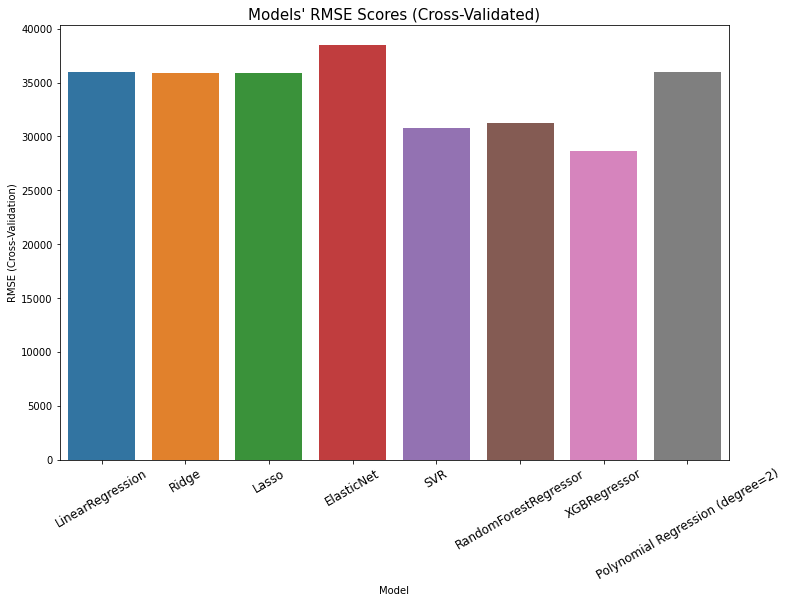

In [63]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()